# **Supervised Learning Models 1**


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier # Usa muestreo boostrap

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


## <font color='blue'>**Boston Housing Dataset**</font>

The objective is to predict, at a business level, the average value of a property in thousands of dollars in Boston (corresponding to the variable **MEDV**)

Information of the attributes:  
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per \$10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    \% lower status of the population
14. MEDV     Median value of owner-occupied homes in \$1000's (target)

Proposed Analysis:

1. Three types of data visualization.

2. Address the classification with different regressive models with cross-validation.


<font color='red'>**1) SOLUTION 1:**</font>

**1)** Preprocessing:

*   Check for nulls and duplicates.
*   Identify atypical data and remove it.
*   Visualization.


In [2]:
#Load the data:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names=['CRIM','ZN','INDUS','CHAS','NOS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv(url,delimiter='\s+', header=None, names=names)

df.head(5)

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
#Number of properties:
print(f'{df.shape[0]}')

506


In [4]:
#Type of variables available:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOS        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
#Sumamry Table:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


The data contains information about 506 properties and all the variables are numeric.


In [6]:
#Null data:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOS        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

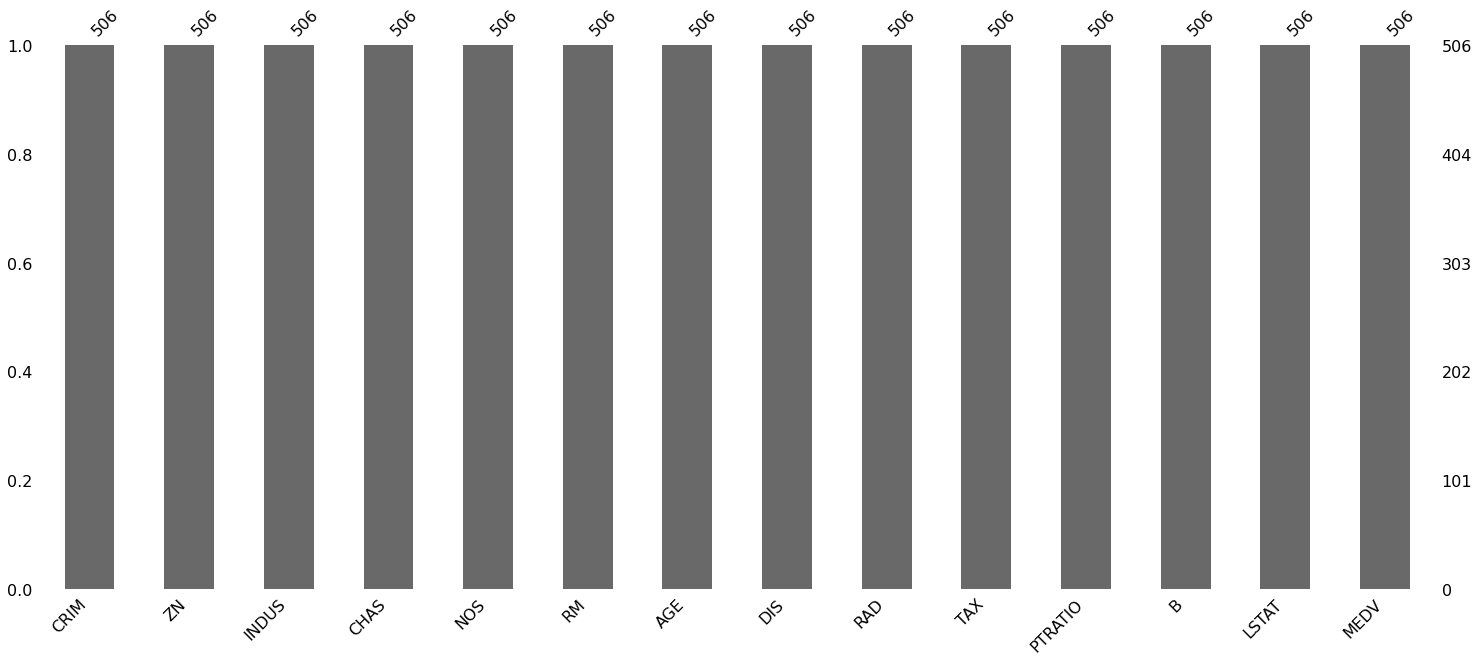

In [7]:
#Alternative

#Here is another way to check for missing data:
import missingno as msno
%matplotlib inline
msno.bar(df)
plt.show()

In [8]:
#Duplicate data:
df.drop_duplicates()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Since there are no nulls or duplicates, we move on.

In [9]:
#We make a backup copy first:
df1=df.copy()

The multidimensional nature of the data allows us to address the identification of atipic values using DBSCAN. However, since the data contains several variables, we will use a dimensionality reduction approach using a Principal Components Analysis (PCA).

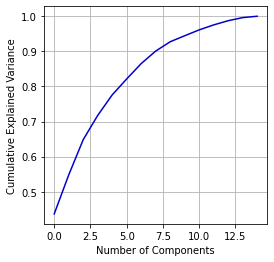

With 5 components, we obtain 0.821 of the variance explained

Number of Variables before PCA: (506, 15)
Number of Components after PCA: (506, 5)


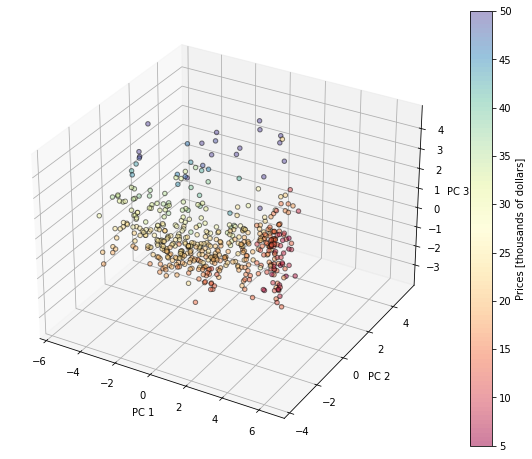

In [26]:
#PCA

#First we estimate how many components explain at least 80% of the variance:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.to_numpy() 

# We normalize the data:
X = StandardScaler().fit_transform(X)
prices = df.MEDV;


#PCA
pca = PCA().fit(X)
fig = plt.figure(figsize=(4,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color="mediumblue")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()
pos_80 = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.8)
print(f'With {pos_80} components, we obtain {np.cumsum(pca.explained_variance_ratio_)[pos_80]:.3f} of the variance explained')

#PCA con n=pos_80
pca = PCA(n_components=pos_80)
projected = pca.fit_transform(X)
print(f'\nNumber of Variables before PCA: {X.shape}')
print(f'Number of Components after PCA: {projected.shape}')

#VISUALIZATION 1
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
im = ax.scatter(projected[:, 0], projected[:, 1],projected[:, 2],
            c=prices, edgecolor='black', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral',100))
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
fig.colorbar(im, ax=ax, label = 'Prices [thousands of dollars]')
plt.grid()
plt.show()

The low prices seem to cluster together and the high prices seem to be scattered but not mixed with the other classes (as always though).

## DBSCAN clustering:

In [11]:
#To determine the right Epsilon, we use the method of the knee:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


Optimum Eps: 1.0466712413658235


<Figure size 288x288 with 0 Axes>

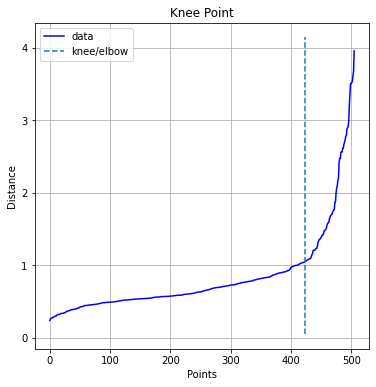

In [27]:
from IPython.display import display
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

warnings.filterwarnings('ignore')
%matplotlib inline

X = projected

# DBSCAN con eps y min_samples arbitrarios
db = DBSCAN(eps=0.11, min_samples=5).fit(X)

# Identificación del eps óptimo
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,5], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(4, 4))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
print(f"Optimum Eps: {distances[knee.knee]}")
plt.grid()
plt.show()

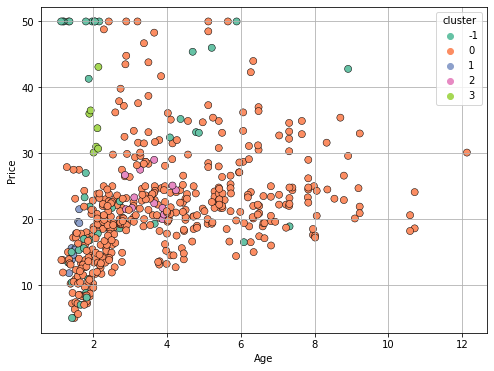

In [43]:
#DBSCAN with optimum eps:
db = DBSCAN(eps=distances[knee.knee], min_samples=5).fit(X)
labels = db.labels_

#the result of the clustering will be now our classes (-1 might be atypical):
df1.loc[:,"cluster"]=labels

#Plot
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x="DIS",y="MEDV", data=df1, hue="cluster",palette="Set2",s=50,linewidth = 0.5,edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Price")
plt.grid()
plt.show()

Removal of atypical values:

In [44]:
df2 = df1[df1["cluster"] != -1]
print(f"{df1.shape[0]-df2.shape[0]} values were removed, {df2.shape[0]} values remain.")

41 values were removed, 465 values remain.


Let's analyze the Pearson correlation between the variables through a correlation matrix: 

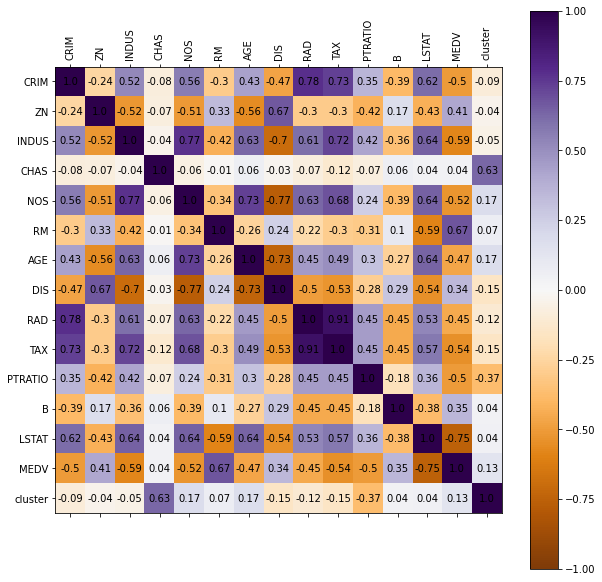

In [15]:
matriz=df2.corr(method='pearson')
plt.rcParams['figure.figsize'] = (10,10);
plt.matshow(matriz, cmap='PuOr', vmin=-1, vmax=1)
plt.xticks(range(df1.shape[1]), df1.columns, rotation=90)
plt.yticks(range(df1.shape[1]), df1.columns)

for i in range(len(matriz.columns)):
      for j in range(len(matriz.columns)):
            plt.text(i, j, round(matriz.iloc[i, j], 2),
            ha="center", va="center")
plt.colorbar()
plt.grid(False)
plt.show()

From the prvious corr matrix we can observe that the variables NOS-INDUS (0.77) and RAD-CRIM (0.78) have the largest positive correlation score, however, the vairbales MEDV-LSTAT (-0.75) and NOS-DIS (-0.77) represent the largest negative correlation. These relationships are shown below:

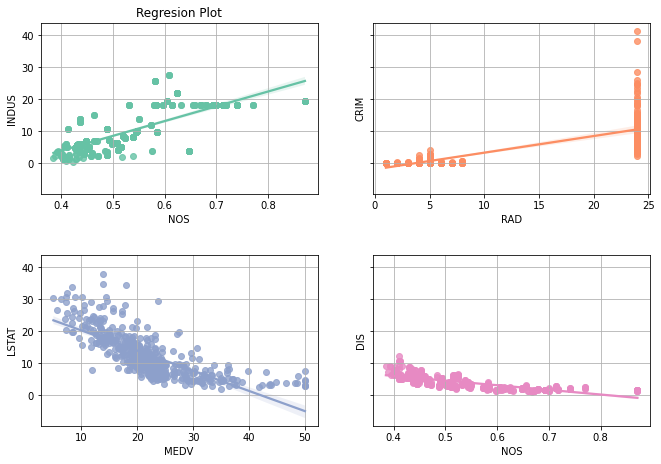

In [46]:
fig, ax = plt.subplots(2,2, figsize=(10,7), sharey=True)
fig.tight_layout(pad=4.0)
colormap=sns.color_palette("Set2",4).as_hex()

#NOS nitric oxides concentration (parts per 10 million)
#INDUS proportion of non-retail business acres per town
sns.regplot(x='NOS', y='INDUS', data=df2, color=colormap[0],ax=ax[0,0])
ax[0,0].set_xlabel("NOS")
ax[0,0].set_ylabel("INDUS")
ax[0,0].set_title("Regresion Plot")
ax[0,0].grid()

#CRIM per capita crime rate by town
#RAD index of accessibility to radial highways
sns.regplot(x='RAD', y='CRIM', data=df2, color=colormap[1],ax=ax[0,1])
ax[0,1].set_xlabel("RAD")
ax[0,1].set_ylabel("CRIM")
ax[0,1].grid()

#LSTAT % lower status of the population
#MEDV Median value of owner-occupied homes in $1000's (target)
sns.regplot(x='MEDV', y='LSTAT', data=df2, color=colormap[2],ax=ax[1,0])
ax[1,0].set_xlabel("MEDV")
ax[1,0].set_ylabel("LSTAT")
ax[1,0].grid()

#NOS nitric oxides concentration (parts per 10 million)
#DIS weighted distances to five Boston employment centres
sns.regplot(x='NOS', y='DIS', data=df2, color=colormap[3],ax=ax[1,1])
ax[1,1].set_xlabel("NOS")
ax[1,1].set_ylabel("DIS")
ax[1,1].grid()
plt.show()

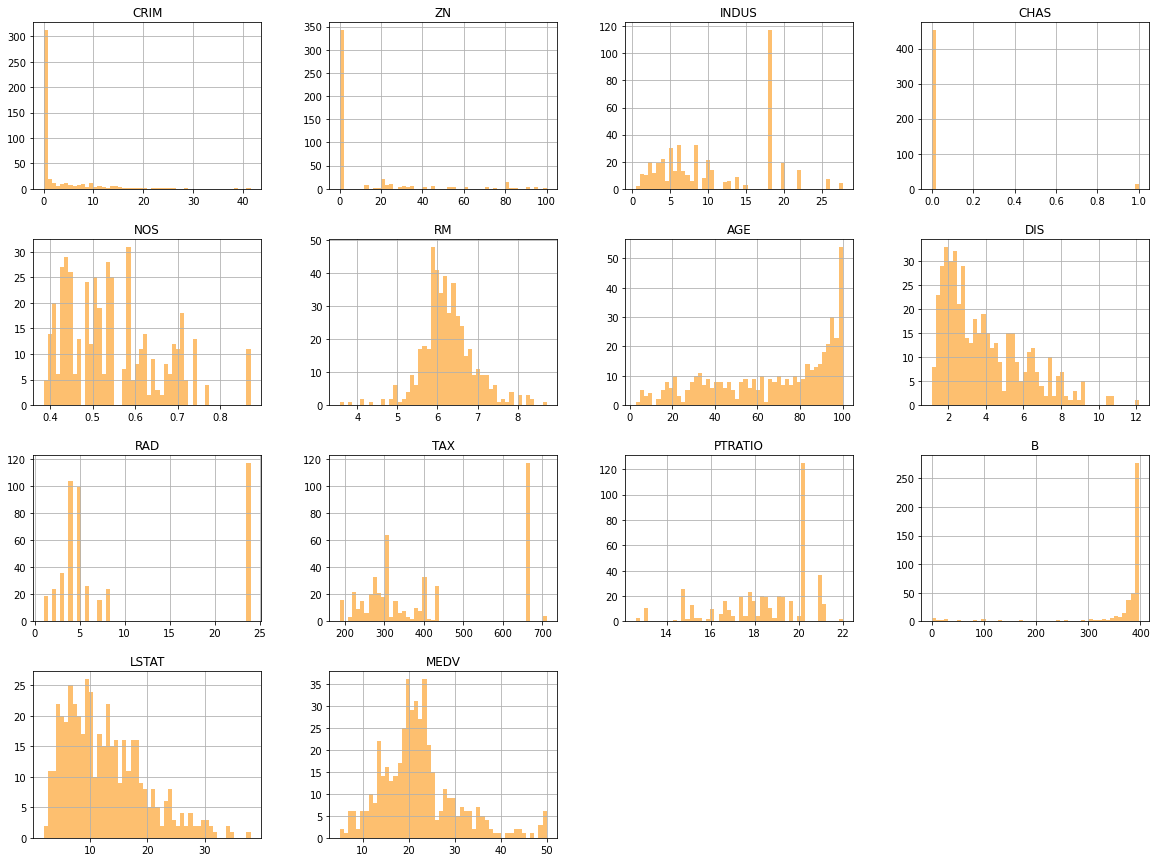

In [47]:
#VISUALIZACION 4
plt.rcParams['figure.figsize'] = (20,15)
colormap=sns.color_palette("Paired",8).as_hex()
df2.iloc[:,0:14].hist(bins=50,color=colormap[6])
plt.grid()
plt.show()

**2**)

La estimación de MEDV se hará a través de tres algoritmos:

1.   Regresión Lineal
2.   Regresión Lineal-Lasso
3.   Gradient Boosting

y se procederá de la siguiente manera:

a) de las 13 variables independientes se obtendrá  la cantidad $n$ de componentes principales (por medio de PCA).

b) luego con MutualInformation se identificarán cuales son esas $n$ componentes principales y con ellas se hará la estimación.

c) como se pide, se harán 20 corridas experimentales con 5 cross_validation  y para cada corrida se medirá el MSE, RMSE y R2 para cada modelo de regresión (LinearRegression, LassoLinearRegression y GradientBoosting). Además en cada corrida se usará GridSearchCV para identificar el hiperparámetro $\alpha$ de LassoLinearRegression. Aquí, a GradientBoosting también se le podría aplicar GridSearchCV para encontrar la configuración óptima de hipeparámetros (  'learning_rate','max_depth','max_features') pero para satisfacer las 20 corridas y obtener un tiempo de ejecución razonable, se escoge no hacerlo.


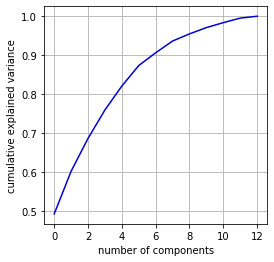

Con 4 componentes, se obtiene el 0.821060992397524 de varianza explicada
Dimensiones iniciales: (465, 13)
Dimensión de la proyección: (465, 4)


In [48]:
#a) 
X = df2.iloc[:,0:13].to_numpy()

# Normalización de las variables
X = StandardScaler().fit_transform(X)

#PCA
pca = PCA().fit(X)
fig = plt.figure(figsize=(4,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color="mediumblue")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()
pos_80 = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.8)
print(f'Con {pos_80} componentes, se obtiene el {np.cumsum(pca.explained_variance_ratio_)[pos_80]} de varianza explicada')

#PCA con n=pos_80
pca = PCA(n_components=pos_80)
projected = pca.fit_transform(X)
print(f'Dimensiones iniciales: {X.shape}')
print(f'Dimensión de la proyección: {projected.shape}')

In [49]:
#b)
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = df2.iloc[:,0:13].to_numpy()
y = df2.iloc[:,13].to_numpy()

# Instanciamos el objeto SelectKBest 
skb = SelectKBest(score_func=f_regression,k=pos_80)         

# Train y transform el dataset en base a SelectKBest
X_data_new = skb.fit_transform(X, y)

# Imprmimimos
print(f'Número de características antes de la selección: {X.shape[1]}')
print(f'Número de características después de la selección: {X_data_new.shape[1]}')

# Imprimir el nombre de las características seleccionadas
print("Las variables seleccionadas son:")
for feature_list_index in skb.get_support(indices=True):
    print("-"+ df2.columns[feature_list_index])

Número de características antes de la selección: 13
Número de características después de la selección: 4
Las variables seleccionadas son:
-INDUS
-RM
-TAX
-LSTAT


luego para estimar el MEDV de la propiedad sólo es necesario obtener información de estos 4 atributos: INDUS, RM, TAX, LSTAT.

In [ ]:
#c) 
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

#Separación en variables independientes (X) y variable dependiente (y):
X = df2[["INDUS","RM","TAX","LSTAT"]]
y = df2[["MEDV"]].to_numpy()

#Escalamiento de los datos:
scl1= StandardScaler().fit(X) 
X = scl1.transform(X)    

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#Se crean variables para guardar las medidas de ajuste y los modelos
lr_mse=[]
lr_rmse=[]
lr_r2=[]
Llr_mse=[]
Llr_rmse=[]
Llr_r2=[]
GB_mse=[]
GB_rmse=[]
GB_r2=[]
LR={}
LLR={}
GB={}

#20 corridas con 5 crossvalidation cada una

for i in range(0,20):
    mse1=[]
    rmse1=[]
    r21=[]
    mse2=[]
    rmse2=[]
    r22=[]
    mse3=[]
    rmse3=[]
    r23=[]

    kf = KFold(n_splits=5, shuffle=True)
    for k, (train_index, test_index) in enumerate(kf.split(X,y)):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            #Linear Regression
            lr = linear_model.LinearRegression()
            lr.fit(X_train, y_train)
            y_pred1 = lr.predict(X_test)
            mse1.append(mean_squared_error(y_test,y_pred1))
            rmse1.append(np.sqrt(mse1[k]))
            r21.append(r2_score(y_test, y_pred1))

            #Linear Lasso Regression
            param_grid = {'alpha': [1.0,0.8,0.5,0.3,0.1]}
            Llr = linear_model.Lasso()
            Llr_cv = GridSearchCV(Llr, param_grid, scoring='neg_mean_squared_error').fit(X_train, y_train) 
            Llr.set_params(**Llr_cv.best_params_)
            Llr.fit(X_train, y_train)
            y_pred2 = Llr.predict(X_test)
            mse2.append(mean_squared_error(y_test,y_pred2))
            rmse2.append(np.sqrt(mse2[k]))
            r22.append(r2_score(y_test, y_pred2)) 

            #GradientBoosting
                #param_grid = {'learning_rate': [],'max_depth': [],'max_features': []}
            gb = GradientBoostingRegressor(n_estimators=300,max_depth=6,max_features=4,learning_rate=0.1,loss='ls')
            gb.fit(X_train, y_train)
            y_pred3 = gb.predict(X_test)
            mse3.append(mean_squared_error(y_test,y_pred3))
            rmse3.append(np.sqrt(mse3[k]))
            r23.append(r2_score(y_test, y_pred3))

    #Se guardan los promedio de las medidas.
    lr_mse.append(np.mean(mse1))
    lr_rmse.append(np.mean(rmse1))
    lr_r2.append(np.mean(r21))
    Llr_mse.append(np.mean(mse2))
    Llr_rmse.append(np.mean(rmse2))
    Llr_r2.append(np.mean(r22))
    GB_mse.append(np.mean(mse3))
    GB_rmse.append(np.mean(rmse3))
    GB_r2.append(np.mean(r23))
    #Se guarda el ultimo modelo del crossvalidation
    LR[i]=lr
    LLR[i]=Llr
    GB[i]=gb

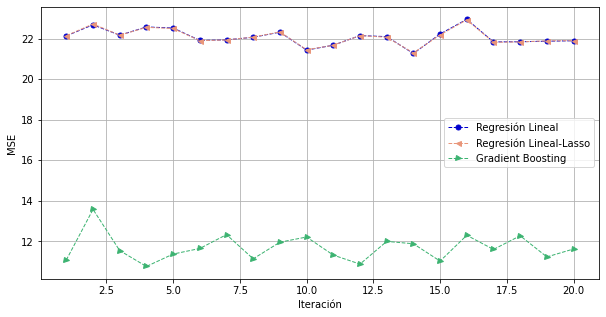

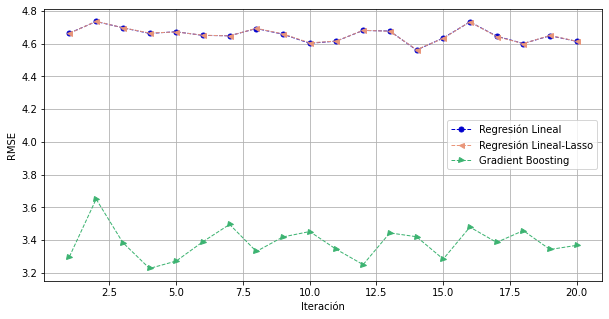

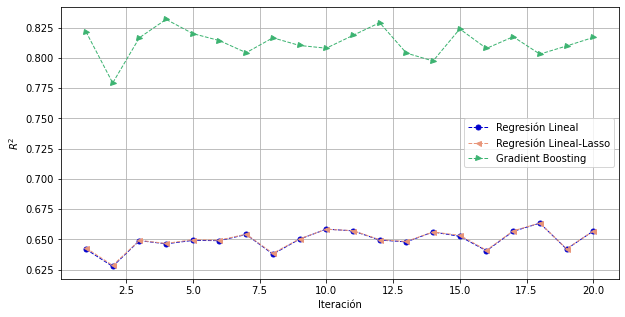

In [ ]:
#Gráficos
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(range(1,21),lr_mse,color="mediumblue",label="Regresión Lineal",marker='o', linestyle='dashed',linewidth=1, markersize=5)
plt.plot(range(1,21),Llr_mse,color="darksalmon",label="Regresión Lineal-Lasso",marker='<', linestyle='dashed',linewidth=1, markersize=5)
plt.plot(range(1,21),GB_mse,color="mediumseagreen",label="Gradient Boosting",marker='>', linestyle='dashed',linewidth=1, markersize=5)
plt.ylabel("MSE")
plt.xlabel("Iteración")
plt.legend()
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = (10,5)
plt.plot(range(1,21),lr_rmse,color="mediumblue",label="Regresión Lineal",marker='o', linestyle='dashed',linewidth=1, markersize=5)
plt.plot(range(1,21),Llr_rmse,color="darksalmon",label="Regresión Lineal-Lasso",marker='<', linestyle='dashed',linewidth=1, markersize=5)
plt.plot(range(1,21),GB_rmse,color="mediumseagreen",label="Gradient Boosting",marker='>', linestyle='dashed',linewidth=1, markersize=5)
plt.ylabel("RMSE")
plt.xlabel("Iteración")
plt.legend()
plt.grid()
plt.show()


plt.rcParams['figure.figsize'] = (10,5)
plt.plot(range(1,21),lr_r2,color="mediumblue",label="Regresión Lineal",marker='o', linestyle='dashed',linewidth=1, markersize=5)
plt.plot(range(1,21),Llr_r2,color="darksalmon",label="Regresión Lineal-Lasso",marker='<', linestyle='dashed',linewidth=1, markersize=5)
plt.plot(range(1,21),GB_r2,color="mediumseagreen",label="Gradient Boosting",marker='>', linestyle='dashed',linewidth=1, markersize=5)
plt.ylabel("$R^2$")
plt.xlabel("Iteración")
plt.legend()
plt.grid()
plt.show()

Del grafico MSE vs Iteración se observa que el error cuadrático medio es menor con Gradient Boosting en comparación con el obtenido por Regresión Lineal y Regresión Lineal-Lasso, cuyos MSE son casi iguales (ver código abajo).

Por otro lado, en el momento del análisis, el valor de $R^2$ más alto para Gradient Boosting se obtiene en la **iteración 4** y por su parte el valor más alto para los modelos de regresión se alcanza en la **iteración 18**. De aquí se genera la gráfica de estimación de los mejores modelos.

**Atención: en cada ejecución del código el resultado cambia.**

In [ ]:
#Diferencia entre MSE de los modelos de regresion lineal
a=Llr_mse
b=lr_mse
diferencia = [e1 - e2 for e1, e2 in zip(a,b)]
diferencia

[0.009644312540654454,
 0.039071336538221146,
 -0.0006622152641462264,
 -0.01821788103577049,
 -0.023146773512756624,
 -0.011291740778986536,
 -0.003343096207188978,
 0.006441350472982776,
 0.011616291472307694,
 0.015111926967936284,
 -0.003695763977475508,
 6.243263242211583e-05,
 -0.029687697894775766,
 0.028857935371174648,
 -0.04313384991049318,
 -0.021696164086144165,
 -0.01650970491875725,
 -0.007881857241013535,
 0.017873964015389987,
 0.006335280747396865]

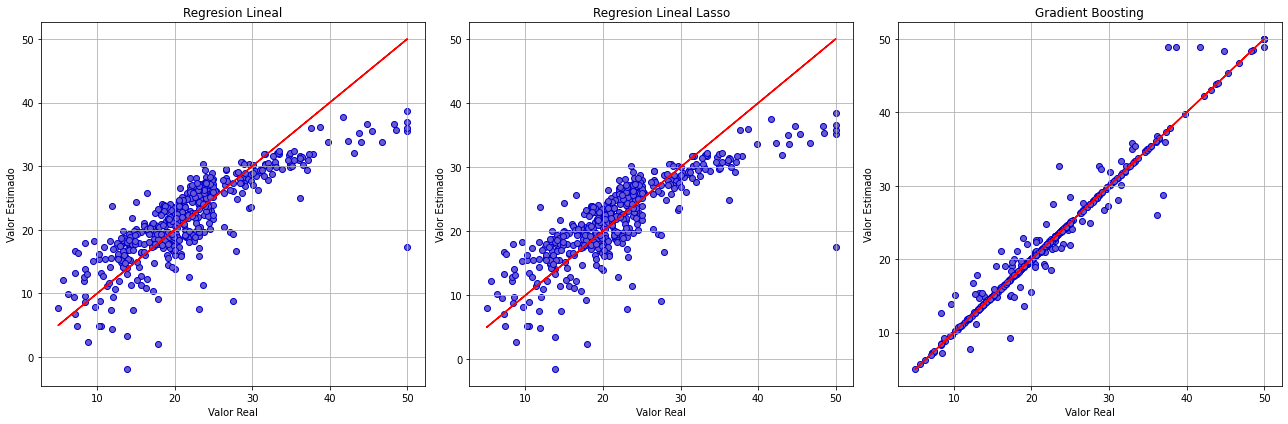

In [ ]:
X = df2[["INDUS","RM","TAX","LSTAT"]]
y = df2[["MEDV"]]
X1 = scl1.transform(X) 

#Modelos escogidos
lr=LR[17]
Llr=LLR[17]
gb=GB[3]

#Estimacion modelo escogido
y_pred1=lr.predict(X1)
y_pred2=Llr.predict(X1)
y_pred3=gb.predict(X1)

#Grafico de la estimacion
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axs[0].scatter(y,y_pred1,color="slateblue",edgecolor="mediumblue")
axs[0].plot(y,y,color="red")
axs[0].set_xlabel('Valor Real')
axs[0].set_ylabel('Valor Estimado')
axs[0].set_title('Regresion Lineal')
axs[0].grid(True)

axs[1].scatter(y,y_pred2,color="slateblue",edgecolor="mediumblue")
axs[1].plot(y,y,color="red")
axs[1].set_xlabel('Valor Real')
axs[1].set_ylabel('Valor Estimado')
axs[1].set_title('Regresion Lineal Lasso')
axs[1].grid(True)
    

axs[2].scatter(y,y_pred3,color="slateblue",edgecolor="mediumblue")
axs[2].plot(y,y,color="red")
axs[2].set_xlabel('Valor Real')
axs[2].set_ylabel('Valor Estimado')
axs[2].set_title('Gradient Boosting')
axs[2].grid(True)

plt.tight_layout()

La recta roja indica cuando valor_real=valor_estimado, por tanto las estimaciones (en azul) deberían posicionarse lo más cerca de la recta roja. El modelo obtenido por GradientBoosting tiene mejor estimación en comparación con los de regresión lineal.

In [ ]:
gb

GradientBoostingRegressor(loss='ls', max_depth=6, max_features=4,
                          n_estimators=300)

<font color='red'>**FIN SOLUCIÓN PROBLEMA 1**</font>